## Line chart with styles

* Мы будем строить график, который отображает два показателя: количество посещений страницы и количество коммитов с течением времени.

#### 1. Подключаемся к базе

In [40]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('../data/checking-logs.sqlite')

#### 2. Загрузка данных

In [41]:
query_views = """
SELECT datetime
FROM pageviews
WHERE uid NOT LIKE 'admin%'
"""
df_views = pd.read_sql_query(query_views, conn)

df_views.head()

,datetime
0,2020-04-17 22:46:26.785035
1,2020-04-18 10:53:52.623447
2,2020-04-18 10:56:55.833899
3,2020-04-18 10:57:37.331258
4,2020-04-18 12:05:48.200144


In [42]:
query_commits = """
SELECT timestamp
FROM checker
WHERE uid NOT LIKE 'admin%' AND labname IS NOT NULL
"""
df_commits = pd.read_sql_query(query_commits, conn)

df_commits.head()

,timestamp
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370


#### 3. Обработка данных

In [43]:
df_views['datetime'] = pd.to_datetime(df_views['datetime'])
df_commits['timestamp'] = pd.to_datetime(df_commits['timestamp'])

df_views['date'] = df_views['datetime'].dt.date
df_commits['date'] = df_commits['timestamp'].dt.date

views_per_day = df_views.groupby('date').size().reset_index(name='views')
commits_per_day = df_commits.groupby('date').size().reset_index(name='commits')

merged_df = pd.merge(views_per_day, commits_per_day, on='date', how='inner')

merged_df.head()

,date,views,commits
0,2020-04-17,1,23
1,2020-04-18,23,69
2,2020-04-19,15,33
3,2020-04-21,3,25
4,2020-04-22,1,27


#### 4. Построение графика

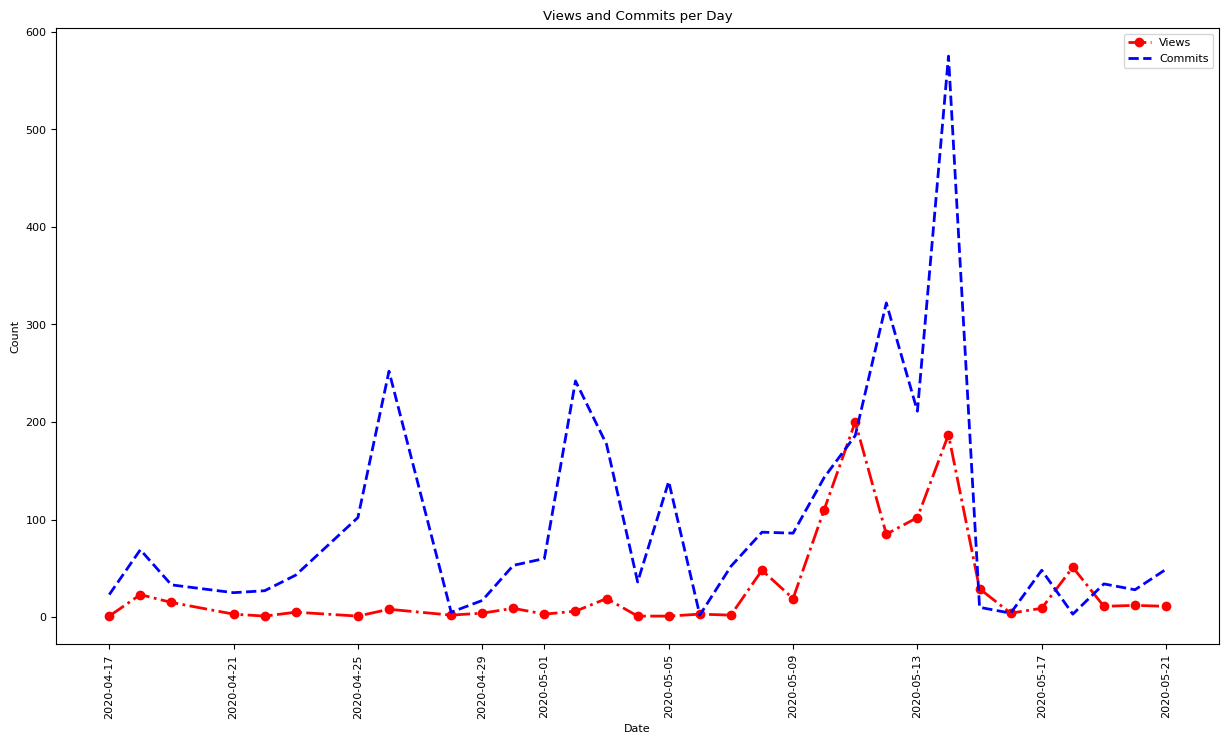

In [44]:
plt.rcParams['font.size'] = 8
plt.figure(figsize=(15, 8))

plt.plot(merged_df['date'], merged_df['views'], label='Views', color='red', linewidth=2, marker='o', linestyle='dashdot')

plt.plot(merged_df['date'], merged_df['commits'], label='Commits', color='blue', linewidth=2, linestyle='--')

plt.title('Views and Commits per Day')
plt.xlabel('Date')
plt.ylabel('Count')

plt.legend()

plt.xticks(rotation=90)

plt.show()

#### 5. Ответ на вопрос “How many times was the number of views larger than 150?” 

In [45]:
count = merged_df[merged_df['views'] > 150].shape[0]

print(f"The answer is {count}.")

The answer is 2.


In [46]:
conn.close()